# 第三章.深度学习基础总结

第三章深度学习基础思维导图.png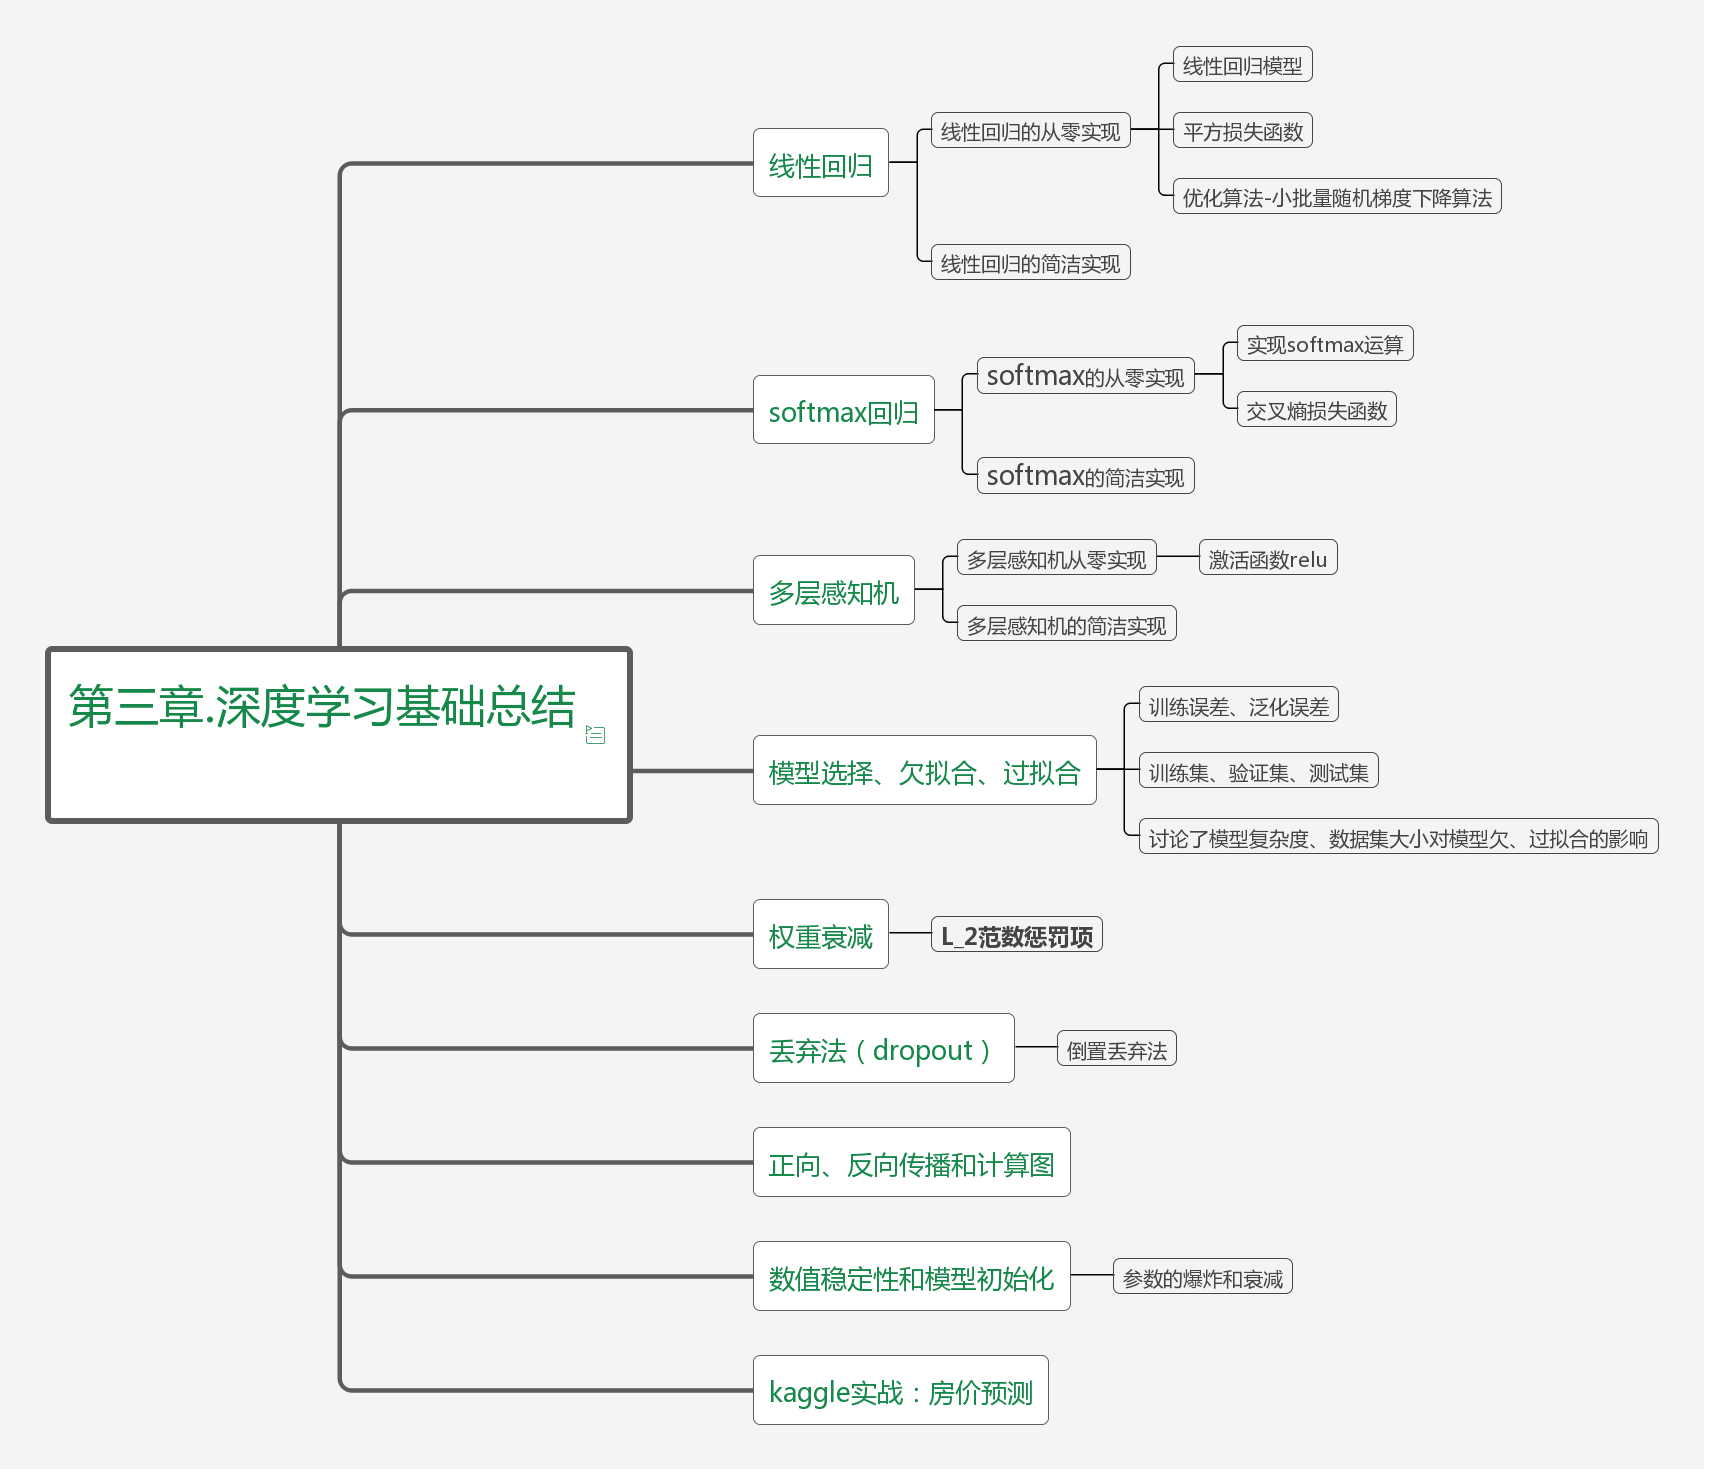

## 线性回归模型

In [1]:
def linreg(X, w, b):  
    return nd.dot(X, w) + b

## 平方损失函数

In [2]:
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 优化算法：小批量随机梯度下降算法

In [3]:
def sgd(params, lr, batch_size):  
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## 实现softmax运算

在介绍如何定义softmax回归之前，我们先描述一下对如何对多维`NDArray`按维度操作。在下面的例子中，给定一个`NDArray`矩阵`X`。我们可以只对其中同一列（`axis=0`）或同一行（`axis=1`）的元素求和，并在结果中保留行和列这两个维度（`keepdims=True`）。

In [5]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition  # 这里应用了广播机制

## 交叉熵损失函数
为了得到标签的预测概率，我们可以使用`pick`函数。通过使用`pick`函数，我们得到了2个样本的标签的预测概率{即真实标签的预测概率}。

In [6]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

## 激活函数relu

In [7]:
def relu(X):
    return nd.maximum(X, 0)

### 定义L_2范数惩罚项

下面定义L_2范数惩罚项。这里只惩罚模型的权重参数。

In [8]:
def l2_penalty(w):
    return (w**2).sum() / 2

## 倒置丢弃法（inverted dropout）

In [9]:
def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    # 这种情况下把全部元素都丢弃
    if keep_prob == 0:
        return X.zeros_like()
    mask = nd.random.uniform(0, 1, X.shape) < keep_prob
    return mask * X / keep_prob